# Part 1 - Extracting Table from Wiki Page

In [2]:
import requests
import lxml

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(wiki_page, 'lxml')
table = soup.find('table')
# table

toronto_table = soup.find('table',{'class':'wikitable sortable'})
links = toronto_table.findAll('td')

pincodes = []
count = 0
for x in links:
    if count == 0:
        x1 = x.text
        count += 1
    elif count == 1:
        x2 = x.text
        count +=1
    elif count == 2:
        x3 = x.text
        x3 = x3.replace('\n','')
        count = 0
        if x3 == 'Not assigned':
            x3 = x2
        if x2 != 'Not assigned':            
            pincodes.append((x1,x2,x3))
# print (pincodes)

result = {}
for x in pincodes:
    if x[0] in result:
        result[x[0]] = [x[0], x[1], result[x[0]][1] + ', ' + x[2]]
    else:
        result[x[0]] = [x[0], x[1], x[2]]
            
results = {}
for count, x in enumerate(result):
    results[count] = [x, result[x][1], result[x][2]]
    
# print(results)

toronto_data = pd.DataFrame.from_dict(results, orient='index', columns=['PostalCode', 'Borough', 'Neighborhood'])
toronto_data

,PostalCode,Borough,Neighborhood
0,M4S,Central Toronto,Davisville
1,M5L,Downtown Toronto,"Downtown Toronto, Victoria Hotel"
2,M4L,East Toronto,"East Toronto, India Bazaar"
3,M8V,Etobicoke,"Etobicoke, New Toronto"
4,M5K,Downtown Toronto,"Downtown Toronto, Toronto Dominion Centre"
5,M3A,North York,Parkwoods
6,M1H,Scarborough,Cedarbrae
7,M6C,York,Humewood-Cedarvale
8,M1R,Scarborough,"Scarborough, Wexford"
9,M6R,West Toronto,"West Toronto, Roncesvalles"


In [ ]:
# Trail - Not WOrking or taking too long time
import geocoder # import geocoder

update_results = {}
for postal_code in toronto_data['PostalCode']:

    lat_lng_coords = None
    while(lat_lng_coords is None):
      geo_info = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
      lat_lng_coords = geo_info.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    update_results[postal_code] = {"latitude":latitude, "longitude":longitude}

In [20]:
toronto_data['PostalCode']

103

# Part 2 - Adding Latitude and Longitude

In [4]:
coordinates = pd.read_csv('http://cocl.us/Geospatial_data')
coordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
final_result = pd.merge(toronto_data, coordinates, on='PostalCode')
final_result

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4S,Central Toronto,Davisville,43.704324,-79.388790
1,M5L,Downtown Toronto,"Downtown Toronto, Victoria Hotel",43.648198,-79.379817
2,M4L,East Toronto,"East Toronto, India Bazaar",43.668999,-79.315572
3,M8V,Etobicoke,"Etobicoke, New Toronto",43.605647,-79.501321
4,M5K,Downtown Toronto,"Downtown Toronto, Toronto Dominion Centre",43.647177,-79.381576
5,M3A,North York,Parkwoods,43.753259,-79.329656
6,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
7,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
8,M1R,Scarborough,"Scarborough, Wexford",43.750072,-79.295849
9,M6R,West Toronto,"West Toronto, Roncesvalles",43.648960,-79.456325


# Part 3 - Clustering

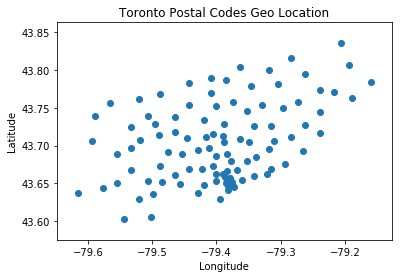

In [14]:
import matplotlib.pyplot as plt

lat_lons = []
lats = []
lons = []
for index, row in final_result.iterrows():
    lat_lons.append([row['Longitude'], row['Latitude']])
    lats.append(row['Latitude'])
    lons.append(row['Longitude'])

plt.scatter(lons, lats)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Toronto Postal Codes Geo Location")
plt.show()

Above plots shows the regions in Toronto. However the clusters are not visible
clearly through visual analysis. It requires detailes Clusteing algorithms like
k-Means for a good analysis. Please refer the following code for more info.

In [18]:
# I have Referred some clustering examples from Kaggle
# https://www.kaggle.com/xxing9703/kmean-clustering-of-latitude-and-longitude

import folium 

toronto_latitude = 43.6532; toronto_longitude = -79.3832
map_toronto = folium.Map(location = [toronto_latitude, toronto_longitude], zoom_start = 10.7)

# adding markers to map
for lat, lng, borough, neighborhood in zip(final_result['Latitude'], final_result['Longitude'], final_result['Borough'], final_result['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#110000',
        fill_opacity=0.7).add_to(map_toronto)  
    

map_toronto

![alt text](Week3_plot3.jpg "Torronto")